In [2]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
# %matplotlib

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

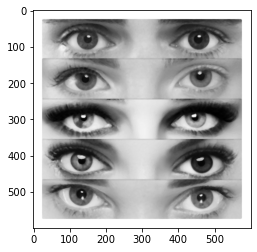

In [3]:
# Leemos la imagen
#=================
img = cv.imread('TP3/eyes.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)


# Suavizamos la imagen
#=====================
gray = cv.medianBlur(gray,5)
# gray = cv.GaussianBlur(gray,(3,3),0)

plt.imshow(gray, cmap='gray')
plt.show()

# cv.imshow('eyes',gray)
# cv.waitKey(0)
# cv.destroyAllWindows()


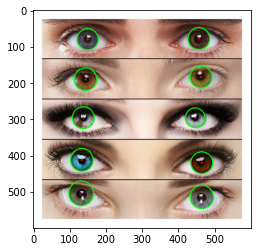

In [8]:


# Obtenemos los círculos por la transformada de Hough
# (imagen en grises, método, flag de resolución del acumulador, dist mín entre centros de círculos
# umbral alto de Canny, umbral del acumulador, radio_min, radio_max)
#===================================================================
img_out = img.copy()
# circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,minDist=150,param1=400,param2=1,minRadius=15,maxRadius=35)
circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,minDist=91,param1=170,param2=20,minRadius=20,maxRadius=35)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out,(i[0],i[1]),1,(0,0,255),3)
# cv.imshow('detected circles',img_out)
# cv.waitKey(0)
# cv.destroyAllWindows()

plt.imshow(cv.cvtColor(img_out,cv.COLOR_BGR2RGB))
plt.show()






In [4]:
circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,minDist=91,param1=170,param2=20,minRadius=20,maxRadius=35)
# print(circles)
ord = np.argsort(circles[0,:,1])
sort_circles = circles[:,ord,:]
# print(sort_circles)
x_coord = sort_circles[0,:,0]
distance = np.zeros(x_coord.shape)
rango = [0,2,4,6,8]
print('Distancias entre centros de Iris en orden de aparición de los ojos:')
for i in rango:
    distance = np.abs(x_coord[i]-x_coord[i+1])
    print(distance)
    

Distancias entre centros de Iris en orden de aparición de los ojos:
305.0
317.0
307.0
330.0
332.0


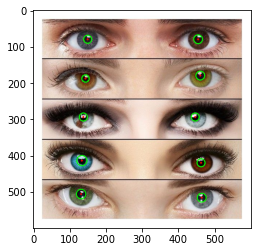

In [9]:
# Detección de Pupila
#===================================================================
img = cv.imread('TP3/eyes.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# gray = cv.GaussianBlur(gray,(5,5),0)
gray = cv.medianBlur(gray,5)

img_out = img.copy()
# circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,minDist=150,param1=400,param2=1,minRadius=15,maxRadius=35)
circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,minDist=20,param1=100,param2=15,minRadius=10,maxRadius=15)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # Dibujamos el círculo externo 
    cv.circle(img_out,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out,(i[0],i[1]),1,(0,0,255),3)
plt.imshow(cv.cvtColor(img_out,cv.COLOR_BGR2RGB))
plt.show()

In [6]:
# Calculo de distancia entre pupilas
#==================================
circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,minDist=20,param1=100,param2=15,minRadius=10,maxRadius=15)
ord = np.argsort(circles[0,:,1])
sort_circles = circles[:,ord,:]
# print(sort_circles)
x_coord = sort_circles[0,:,0]
distance = np.zeros(x_coord.shape)
rango = [0,2,4,6,8]
print('Distancias entre centros de Pupilas en orden de aparición de los ojos:')
for i in rango:
    distance = np.abs(x_coord[i]-x_coord[i+1])
    print(distance)

Distancias entre centros de Pupilas en orden de aparición de los ojos:
305.0
317.0
307.0
329.0
331.0
